/usr/local/lib/python3.6/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


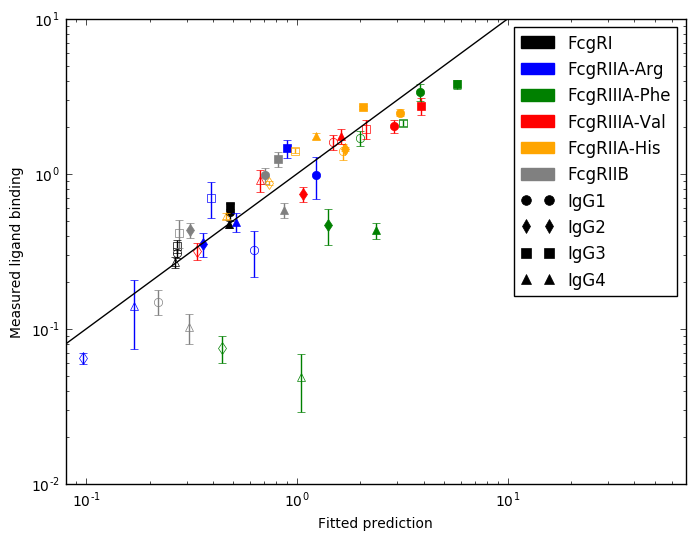

In [52]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import StoneHelper
import StoneModel

importlib.reload(StoneHelper)
importlib.reload(StoneModel)

M, dset = StoneHelper.read_chain("mcmc_chain.h5")

bestIDX = np.argmax(dset['LL'])

p = dset.iloc[bestIDX,:][2:].as_matrix()

fitFrame = StoneHelper.getFitMeasMerged(M, p)

StoneHelper.plotFit(fitFrame)

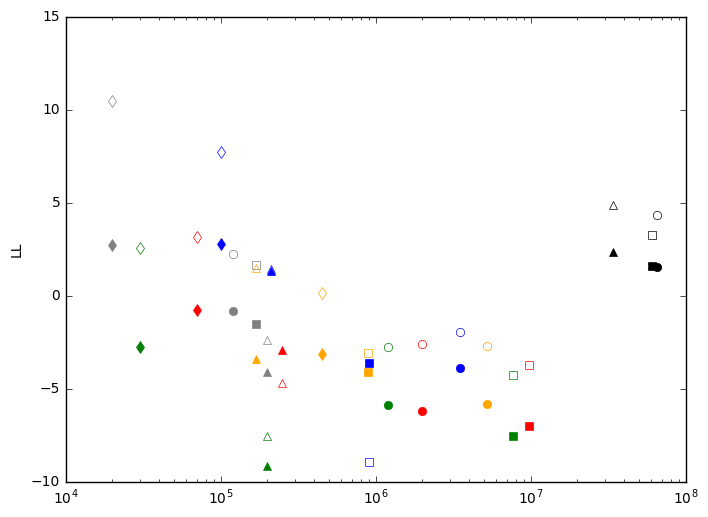

In [36]:
fitFrameTwo = fitFrame
StoneHelper.plotQuant(fitFrameTwo, 'LL')

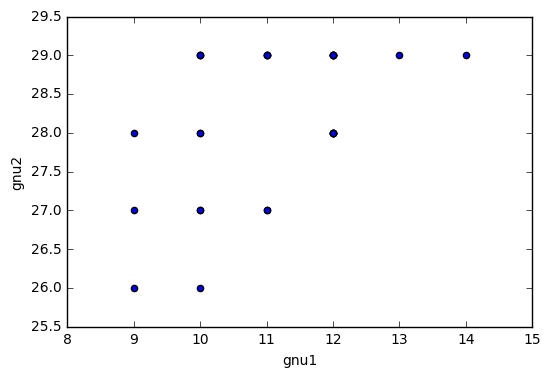

In [48]:
goodFits = dset[dset['LL'] > max(dset['LL'])-2]

goodFits.plot('gnu1', 'gnu2', 'scatter')

In [ ]:
(fitFrame).to_csv("out.csv")

#fitFrame.plot('Ka', 'LbndPred', 'scatter', loglog = True)

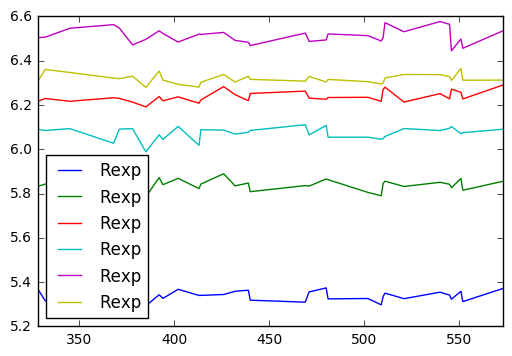

In [51]:
from sklearn import preprocessing

goodFits2 = goodFits.iloc[:,2:8]

#goodFits2 = goodFits2.apply(lambda V: preprocessing.scale(V,axis=0,with_mean=True, with_std=True,copy=False),axis=1)

goodFits2.plot()

In [19]:
importlib.reload(StoneHelper)
StoneHelper.plotL(fitFrame)

AttributeError: module 'StoneHelper' has no attribute 'plotL'

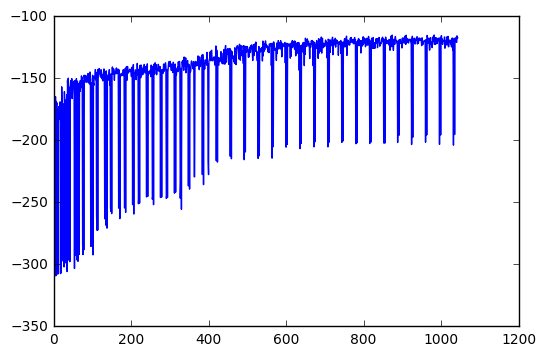

In [17]:
plt.plot(dset['LL'][1:3000])